# 구매 예측하기!!

# 1. package 가져오기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
os.listdir()

['01SR_Data.csv',
 '02.Classification_with_Python.ipynb',
 '03.Classification_with_scikitlearn(Titanic).ipynb',
 '.ipynb_checkpoints',
 '01.Regression_with_Python.ipynb',
 '03Titanic_dataset.csv',
 '02Social_Network_Ads.csv']

In [3]:
df = pd.read_csv("02Social_Network_Ads.csv")

# 2. 데이터 프레임

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15566689,Female,35.0,57000.0,0
1,15569641,Female,58.0,95000.0,1
2,15570769,Female,26.0,80000.0,0
3,15570932,Male,34.0,115000.0,0
4,15571059,Female,33.0,41000.0,0


# 3. 데이터 살펴보기


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           394 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  388 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,394,390.000000,388.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,202,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.782051,69628.865979,0.357500
std,7.165832e+04,NaN,10.452300,33889.337949,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,30.000000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,87250.000000,1.000000


# 4. feature/label 분리


In [8]:
df["User ID"].nunique()

400

==> 중복된 ID가 없기때문에 feature에서 제외해도 무관함

In [9]:
feature = df.iloc[:,1:-1]
label = df.iloc[:, -1:]

In [10]:
feature.head()

,Gender,Age,EstimatedSalary
0,Female,35.0,57000.0
1,Female,58.0,95000.0
2,Female,26.0,80000.0
3,Male,34.0,115000.0
4,Female,33.0,41000.0


In [11]:
label.head()

,Purchased
0,0
1,1
2,0
3,0
4,0


# 5. 빠진 값 확인 


In [12]:
df.isnull().sum()

User ID             0
Gender              6
Age                10
EstimatedSalary    12
Purchased           0
dtype: int64

In [13]:
pd.DataFrame(feature.isnull().sum()).T

,Gender,Age,EstimatedSalary
0,6,10,12


<AxesSubplot:>

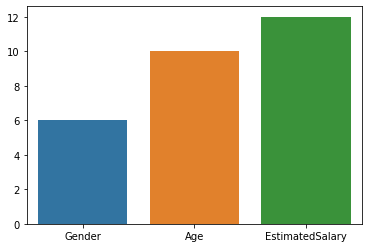

In [14]:
sns.barplot(data=pd.DataFrame(feature.isnull().sum()).T)

# 6. Clean Missing Data

In [15]:
missing= df.loc[(df.Age.isnull())|
       (df.EstimatedSalary.isnull())|
       (df.Gender.isnull())]

In [16]:
missing.shape

(28, 5)

In [17]:
# 전체 결측치 해당 비율
missing.shape[0]/df.shape[0]*100

7.000000000000001

In [18]:
feature1 = feature.copy()
feature2 = feature.copy()
label1 = label.copy()
label2 = label.copy()

삭제해도 괜찮다라고 판단되지만,  
혹시 대치할만한 값을 찾을 수 있으니 탐색해보자!

## 6-1. numeric

**결측치가 있는 Age와 Salary열을 확인함**

In [19]:
df.describe()[["Age","EstimatedSalary"]]

,Age,EstimatedSalary
count,390.000000,388.000000
mean,37.782051,69628.865979
std,10.452300,33889.337949
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,87250.000000
max,60.000000,150000.000000


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

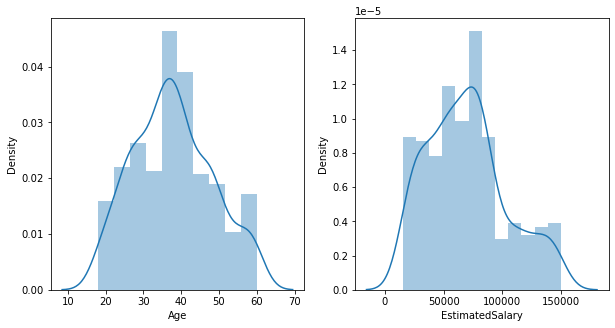

In [20]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.distplot(df["Age"], ax=axes[0])
sns.distplot(df["EstimatedSalary"], ax=axes[1])

<AxesSubplot:ylabel='EstimatedSalary'>

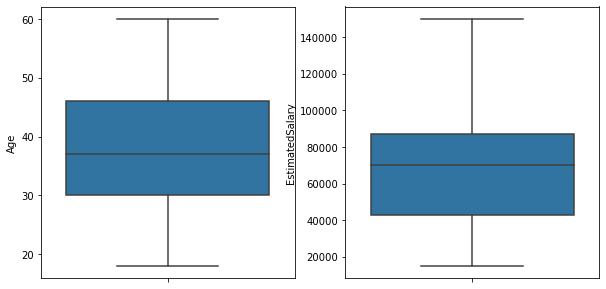

In [21]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, y="Age", ax=axes[0])
sns.boxplot(data=df, y="EstimatedSalary", ax=axes[1])

### 고민해보기

In [22]:
age_p = df.Age.isnull().sum()/df.shape[0]*100
salary_p = df.EstimatedSalary.isnull().sum()/df.shape[0]*100

print(f'Age열에서 결측치는 전체 데이터 행 중 {age_p}%에 해당되고,')
print()
print(f'Estimated Salary열에서 결측치는 전체 데이터 행중 {salary_p}%에 해당됨')

Age열에서 결측치는 전체 데이터 행 중 2.5%에 해당되고,

Estimated Salary열에서 결측치는 전체 데이터 행중 3.0%에 해당됨


### 결과

drop 해주기로 정함

In [23]:
# 나이와 급여가 없는 것
not_a_s = feature1[(feature1.Age.isnull())|
                   (feature1.EstimatedSalary.isnull())]
not_a_s

,Gender,Age,EstimatedSalary
16,Male,23.0,NaN
19,Female,NaN,47000.0
71,Female,41.0,NaN
92,Male,NaN,53000.0
106,Male,47.0,NaN
110,Male,49.0,NaN
127,Male,34.0,NaN
155,Female,26.0,NaN
221,Female,NaN,35000.0
230,Female,35.0,NaN


In [24]:
not_a_s.index

Int64Index([ 16,  19,  71,  92, 106, 110, 127, 155, 221, 230, 246, 262, 264,
            269, 284, 289, 303, 320, 335, 361, 365, 382],
           dtype='int64')

In [25]:
feature1.drop(not_a_s.index,inplace=True)

In [26]:
feature1.head()

,Gender,Age,EstimatedSalary
0,Female,35.0,57000.0
1,Female,58.0,95000.0
2,Female,26.0,80000.0
3,Male,34.0,115000.0
4,Female,33.0,41000.0


In [27]:
# 잘 삭제 됨을 확인!
feature1.shape

(378, 3)

In [28]:
# 혹시 모르니 평균값 대치방법으로 하나 만들어보자
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")

feature2.iloc[:,1:] = mean_imputer.fit_transform(feature2.iloc[:,1:])

feature2.isnull().sum()

Gender             6
Age                0
EstimatedSalary    0
dtype: int64

## 6.2 string


In [29]:
df.describe(include="object")

,Gender
count,394
unique,2
top,Female
freq,202


In [30]:
df[df["Gender"].isnull()]

,User ID,Gender,Age,EstimatedSalary,Purchased
55,15598044,NaN,27.0,84000.0,0
162,15671766,NaN,26.0,72000.0,0
204,15694946,NaN,24.0,55000.0,0
287,15745083,NaN,26.0,80000.0,0
384,15807481,NaN,28.0,79000.0,0
386,15807837,NaN,48.0,33000.0,1


### 고민해보기
**20대가 많기에 20대의 성별 최빈값 넣어야할지 고려하기**

In [31]:
gender_20 = df.loc[(df.Age>=20) & (df.Age<30),["Gender"]]
gender_20

,Gender
2,Female
5,Female
13,Female
16,Male
24,Male
...,...
375,Female
381,Male
384,NaN
389,Male


In [32]:
gender_20.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [33]:
gender_20.Gender.fillna("no",inplace=True)

In [34]:
gender_20.value_counts()

Gender
Female    40
Male      39
no         5
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

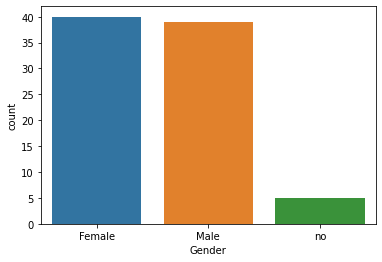

In [35]:
sns.countplot(data=gender_20, x="Gender")

**남/여 비율 차이가 없기에, 대치불가**

In [36]:
gender_p = df.Gender.isnull().sum()/df.shape[0]*100

f'결측치는 전체 데이터 행 중 {gender_p}%에 해당'

'결측치는 전체 데이터 행 중 1.5%에 해당'

### 결과 

-> drop 해주기

In [37]:
# 성별 없는것
not_g = df[df.Gender.isnull()]
not_g

,User ID,Gender,Age,EstimatedSalary,Purchased
55,15598044,NaN,27.0,84000.0,0
162,15671766,NaN,26.0,72000.0,0
204,15694946,NaN,24.0,55000.0,0
287,15745083,NaN,26.0,80000.0,0
384,15807481,NaN,28.0,79000.0,0
386,15807837,NaN,48.0,33000.0,1


In [38]:
not_g.index

Int64Index([55, 162, 204, 287, 384, 386], dtype='int64')

In [39]:
# 위에서 nuemeric drop 처리해준 feature에 더하여 drop 해주기
feature1= feature1.drop(not_g.index, axis=0)
feature1.head(1)

,Gender,Age,EstimatedSalary
0,Female,35.0,57000.0


In [40]:
# label에서도 해당 index drop 해주기
hap = list(not_a_s.index) + list(not_g.index)
label1= label.drop(hap)

In [41]:
# index 정렬해주기
feature1.sort_index(inplace=True)
label1.sort_index(inplace=True)

In [42]:
# 혹시모르니 drop하지않고 최빈값으로
string_imputer = SimpleImputer(strategy='most_frequent')
feature2.iloc[:, 0] = string_imputer.fit_transform(feature2.iloc[:, 0:1])

feature2.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

# 7. One hot encoding


In [43]:
feature1

,Gender,Age,EstimatedSalary
0,Female,35.0,57000.0
1,Female,58.0,95000.0
2,Female,26.0,80000.0
3,Male,34.0,115000.0
4,Female,33.0,41000.0
...,...,...,...
395,Male,40.0,107000.0
396,Male,27.0,20000.0
397,Male,57.0,60000.0
398,Male,31.0,66000.0


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer( [("ohe",
                          OneHotEncoder(),[0])],
                       remainder= 'passthrough')

sub1 = ct.fit_transform(feature1)
sub2 = ct.fit_transform(feature2)

In [47]:
feature1.Gender = sub1
feature2.Gender = sub2

In [48]:
print(feature1,"\n\n=========\n\n", feature2)

     Gender   Age  EstimatedSalary
0       1.0  35.0          57000.0
1       1.0  58.0          95000.0
2       1.0  26.0          80000.0
3       0.0  34.0         115000.0
4       1.0  33.0          41000.0
..      ...   ...              ...
395     0.0  40.0         107000.0
396     0.0  27.0          20000.0
397     0.0  57.0          60000.0
398     0.0  31.0          66000.0
399     1.0  45.0         131000.0

[372 rows x 3 columns] 


      Gender   Age  EstimatedSalary
0       1.0  35.0          57000.0
1       1.0  58.0          95000.0
2       1.0  26.0          80000.0
3       0.0  34.0         115000.0
4       1.0  33.0          41000.0
..      ...   ...              ...
395     0.0  40.0         107000.0
396     0.0  27.0          20000.0
397     0.0  57.0          60000.0
398     0.0  31.0          66000.0
399     1.0  45.0         131000.0

[400 rows x 3 columns]


# 8. split data


In [51]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(feature1, 
                                                    label1,
                                                    test_size=0.2,
                                                    random_state=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(feature2, 
                                                    label2,
                                                    test_size=0.2,
                                                    random_state=1)

print(X1_train.shape)
print(X1_test.shape)
print(X2_train.shape)
print(X2_test.shape)

(297, 3)
(75, 3)
(320, 3)
(80, 3)


# 9. train


In [81]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X1_train, y1_train)
logistic.fit(X2_train, y2_train)

LogisticRegression()

In [54]:
# 의사결정나무 분류
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X1_train, y1_train)
tree.fit(X2_train, y2_train)

y1_pred_tree = tree.predict(X1_test)
y2_pred_tree = tree.predict(X2_test)

# 10. Score


In [59]:
y1_pred = logistic.predict(X1_test)
y2_pred = logistic.predict(X2_test)
print(y1_pred)
print("\n\n=========\n\n")
print(y2_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]




[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


# 11. Evaluate


In [66]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc1 = accuracy_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)

print(acc1)
print(recall1)
print(precision1)

print("\n=========\n")
acc2 = accuracy_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)

print(acc2)
print(recall2)
print(precision2)

0.64
0.0
0.0


0.6125
0.0
0.0


In [65]:
print(accuracy_score(y1_test, y1_pred_tree))

print("\n=========\n")

print(accuracy_score(y2_test, y2_pred_tree))

0.96


0.9125


# 12. Confusion Matrix


In [64]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y1_test, y1_pred_tree)
cm2 = confusion_matrix(y2_test, y2_pred_tree)
print(cm1)
print("\n=========\n")
print(cm2)

[[48  0]
 [ 3 24]]


[[46  3]
 [ 4 27]]


# 13. CM Visualize


In [79]:
plt.rc("font", family="Malgun Gothic")

<AxesSubplot:>

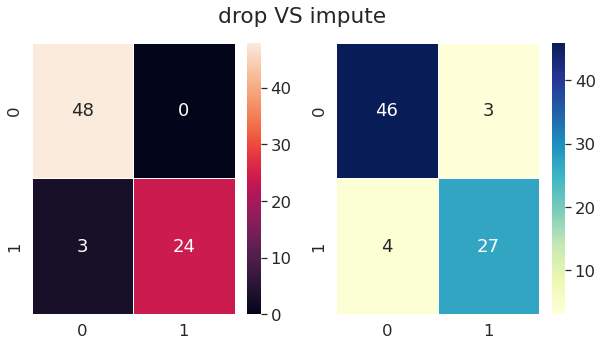

In [80]:
fig, axes= plt.subplots (1,2, figsize=(10,5))
plt.suptitle("drop VS impute")
sns.set(font_scale=1.5)
sns.heatmap(cm1, linewidths=0.5, annot=True, ax=axes[0])
sns.heatmap(cm2, linewidths=0.5,annot=True, ax=axes[1], cmap="YlGnBu")

# 결론

결측치를 drop한 경우가 대치법(수치형은 평균, 문자형은 최빈)보다 더 예측을 잘한 걸로 생각됨!